In [1]:
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
import time 
import sys 
sys.path.append('/Users/aleksandra/Desktop/Research/ILC_params/')

from HOD import *
from ilc_params import *

font = {'size'   : 16, 'family':'STIXGeneral'}
plt.rcParams.update({
     "text.usetex": True,
     "font.family": "serif",
     "font.sans-serif": ['Computer Modern']})
plt.rc_context({'axes.autolimit_mode': 'round_numbers'})

# Setup

In [2]:
color = "blue" 
nu_list = 217,353,545
nu_list_str = '217,353,545'

# nu_list = 220,280,350,550,8501
# nu_list_str = '220,280,350,550,850'

In [3]:
cib_flux={}
# flux cut, Table 1 in https://arxiv.org/pdf/1309.0382.pdf
#Planck
cib_flux['100'] = 400
cib_flux['143'] = 350
cib_flux['217'] = 225
cib_flux['353'] = 315
cib_flux['545'] = 350
cib_flux['857'] = 710
cib_flux['3000'] = 1000

#CCAT prime, Fiona's assumptions
# cib_flux['93'] = 400
# cib_flux['145'] = 350
# cib_flux['225'] = 225
# cib_flux['220'] = 225
# cib_flux['280'] = 225
# cib_flux['350'] = 315
# cib_flux['550'] = 350
# cib_flux['545'] = 350
# cib_flux['850'] = 710

#SO 
cib_flux['93'] = 7
cib_flux['145'] = 15
cib_flux['225'] = 20
cib_flux['280'] = 25

cib_flux_list = []
keys = list(cib_flux.keys())

for i,nu in enumerate(nu_list):
    if str(nu) in keys: 
        cib_flux_list.append(cib_flux[str(nu)])
        print(cib_flux[str(nu)])
    else: 
        cib_flux_list.append(0.3)
        print(0)
print("Flux cuts: ", cib_flux_list)

str(list(cib_flux_list))[1:-1]

225
315
350
Flux cuts:  [225, 315, 350]


'225, 315, 350'

In [4]:
if color=="blue":
    hod_pdict = blue_hod_pdict
    s = s_blue
if color=="green":
    hod_pdict = green_hod_pdict
    s = s_green
if color=="red":
    hod_pdict = red_hod_pdict  
    s = s_red
    
hod_pdict['galaxy_sample_id']

'blue'

# Dictionaries

In [5]:
p18_cosmo = {
     # P18 1st column table 1 of https://arxiv.org/pdf/1807.06209.pdf
    'omega_b': 0.022383,
    'omega_cdm': 0.12011,
    'h': 0.6732,
    'tau_reio': 0.0543,
    'ln10^{10}A_s': 3.0448,
    'n_s': 0.96605,
    'k_pivot': 0.05,
    'N_ncdm': 1,
    'N_ur': 2.0328,
    'm_ncdm': 0.06
}


# # parameters for Cosmology planck 14, https://arxiv.org/pdf/1303.5076.pdf, best-fit
p14_dict={}
p14_dict['Omega_cdm'] = 0.3175-0.022068/0.6711/0.6711
p14_dict['omega_b'] = 0.022068
p14_dict['h'] = 0.6711
p14_dict['A_s'] = 2.2e-9
p14_dict['n_s'] = .9624
p14_dict['k_pivot'] = 0.05
p14_dict['tau_reio'] = 0.0925

p14_dict['N_ncdm'] = 1
p14_dict['N_ur'] = 0.00641
p14_dict['deg_ncdm'] = 3
p14_dict['m_ncdm'] = 0.02
p14_dict['T_ncdm'] = 0.71611



# Boris benchmark
p_dict = {}
p_dict['mass function'] = 'T10'
p_dict['concentration parameter'] = 'D08'
p_dict['delta for cib'] = '200m'
p_dict['hm_consistency'] = 1
p_dict['damping_1h_term'] = 0

# mass bounds
p_dict['M_min_cib'] = 1e8*p18_pdict['h']
p_dict['M_max_cib'] = 1e16*p18_pdict['h']

# redshift bounds
p_dict['z_min'] = 0.07
p_dict['z_max'] = 6. # fiducial for MM20 : 6

p_dict['freq_min'] = 10.
p_dict['freq_max'] = 5e4 # fiducial for MM20 : 6

# HOD parameters for CIB
p_dict['M_min_HOD_cib'] = pow(10.,10)
#p_dict['M1_prime_HOD'] =pow(10.,125.1536196)*p_dict['h']


# CIB parametes see McCarthy & Madhavacheril 2020
p_dict['Redshift evolution of dust temperature'] =  0.36
p_dict['Dust temperature today in Kelvins'] = 24.4
p_dict['Emissivity index of sed'] = 1.75
p_dict['Power law index of SED at high frequency'] = 1.7
p_dict['Redshift evolution of L − M normalisation'] = 3.6
p_dict['Most efficient halo mass in Msun'] = pow(10.,12.6)
p_dict['Normalisation of L − M relation in [Jy MPc2/Msun]'] = 6.4e-8
p_dict['Size of of halo masses sourcing CIB emission'] = 0.5

# precision parameters
p_dict['pressure_profile_epsabs'] = 1.e-8
p_dict['pressure_profile_epsrel'] = 1.e-3
# precision for redshift integal
p_dict['redshift_epsabs'] = 1e-40#1.e-40
p_dict['redshift_epsrel'] = 1e-4#1.e-10 # fiducial value 1e-8
# precision for mass integal
p_dict['mass_epsabs'] = 1e-40 #1.e-40
p_dict['mass_epsrel'] = 1e-4#1e-10
# precision for Luminosity integral (sub-halo mass function)
p_dict['L_sat_epsabs'] = 1e-40 #1.e-40
p_dict['L_sat_epsrel'] = 1e-3#1e-10

p_dict['z_max_pk'] = p_dict['z_max']

# multipole array
p_dict['dell'] = 30
p_dict['ell_max'] = 8000.
p_dict['ell_min'] = 2.




## Fiona original but with P18 cosmo 

In [6]:
F = Class()
F.set(p18_cosmo)
F.set(p_dict)

F.set({# class_sz parameters:
        'output':'cib_cib_1h,cib_cib_2h',
        'class_sz_verbose':0,
        
        'cib_frequency_list_num' : len(nu_list),
        'cib_frequency_list_in_GHz' : nu_list_str,  
        'cib_Snu_cutoff_list [mJy]': str(list(cib_flux_list))[1:-1],
        'has_cib_flux_cut': 1
        })
        
F.compute()

In [7]:
cl_cib_cib_fiona = F.cl_cib_cib()
cib_fiona = np.asarray(cl_cib_cib_fiona[str(nu_list[0])+'x'+str(nu_list[0])]['1h']) + np.asarray(cl_cib_cib_fiona[str(nu_list[0])+'x'+str(nu_list[0])]['2h'])
ell_fiona = np.asarray(cl_cib_cib_fiona[str(nu_list[0])+'x'+str(nu_list[0])]['ell'])

## Fiona (Boris comparison)

In [8]:
B = Class()
B.set(p_dict)
B.set(p14_dict)
#B.set(p18_cosmo)

B.set({# class_sz parameters:
        'output':'cib_cib_1h,cib_cib_2h',
        'class_sz_verbose':0,
        
        'cib_frequency_list_num' : len(nu_list),
        'cib_frequency_list_in_GHz' : nu_list_str,  
        'cib_Snu_cutoff_list [mJy]': str(list(cib_flux_list))[1:-1],
        'has_cib_flux_cut': 1
        })
        
B.compute()

In [9]:
cl_cib_cib_boris = B.cl_cib_cib()
cib_boris = np.asarray(cl_cib_cib_boris[str(nu_list[0])+'x'+str(nu_list[0])]['1h']) + np.asarray(cl_cib_cib_boris[str(nu_list[0])+'x'+str(nu_list[0])]['2h'])
ell_boris = np.asarray(cl_cib_cib_boris[str(nu_list[0])+'x'+str(nu_list[0])]['ell'])

In [10]:
cib_boris[:10] 

array([9.11204294e+01, 1.05765843e+05, 4.64301289e+05, 9.57673188e+05,
       1.45208100e+06, 1.89900386e+06, 2.31749768e+06, 2.74215690e+06,
       3.18658697e+06, 3.63518663e+06])

In [11]:
cib_boris[:10] 
ell_boris

array([2.000e+00, 3.200e+01, 6.200e+01, 9.200e+01, 1.220e+02, 1.520e+02,
       1.820e+02, 2.120e+02, 2.420e+02, 2.720e+02, 3.020e+02, 3.320e+02,
       3.620e+02, 3.920e+02, 4.220e+02, 4.520e+02, 4.820e+02, 5.120e+02,
       5.420e+02, 5.720e+02, 6.020e+02, 6.320e+02, 6.620e+02, 6.920e+02,
       7.220e+02, 7.520e+02, 7.820e+02, 8.120e+02, 8.420e+02, 8.720e+02,
       9.020e+02, 9.320e+02, 9.620e+02, 9.920e+02, 1.022e+03, 1.052e+03,
       1.082e+03, 1.112e+03, 1.142e+03, 1.172e+03, 1.202e+03, 1.232e+03,
       1.262e+03, 1.292e+03, 1.322e+03, 1.352e+03, 1.382e+03, 1.412e+03,
       1.442e+03, 1.472e+03, 1.502e+03, 1.532e+03, 1.562e+03, 1.592e+03,
       1.622e+03, 1.652e+03, 1.682e+03, 1.712e+03, 1.742e+03, 1.772e+03,
       1.802e+03, 1.832e+03, 1.862e+03, 1.892e+03, 1.922e+03, 1.952e+03,
       1.982e+03, 2.012e+03, 2.042e+03, 2.072e+03, 2.102e+03, 2.132e+03,
       2.162e+03, 2.192e+03, 2.222e+03, 2.252e+03, 2.282e+03, 2.312e+03,
       2.342e+03, 2.372e+03, 2.402e+03, 2.432e+03, 

## Websky

In [12]:
# #websky 
# N = Class()
# N.set(p18_pdict)
# #N.set(websky_tsz_pdict)
# N.set(websky_cib_pdict)
# N.set(common_settings)

# N.set({# class_sz parameters:

#         'output':'cib_cib_1h,cib_cib_2h,dcib0dz',
        
#         'cib_frequency_list_num' : len(nu_list),
#         'cib_frequency_list_in_GHz' : nu_list_str,  
#         'cib_Snu_cutoff_list [mJy]': str(list(cib_flux_list))[1:-1],
#         'has_cib_flux_cut': 1
#         })
        
# N.compute()

In [13]:
# cl_cib_cib = N.cl_cib_cib()
# cib1 = np.asarray(cl_cib_cib[str(nu_list[0])+'x'+str(nu_list[0])]['1h']) + np.asarray(cl_cib_cib[str(nu_list[0])+'x'+str(nu_list[0])]['2h'])
# ell1 = np.asarray(cl_cib_cib[str(nu_list[0])+'x'+str(nu_list[0])]['ell'])

## Fiona with our HMF etc

In [14]:
M = Class()

M.set(hod_pdict)
M.set(websky_tsz_pdict)
M.set(p_dict)
M.set(p18_pdict)
M.set(common_settings)

M.set({# class_sz parameters:
        'output':'cib_cib_1h,cib_cib_2h',
        #'mass function': 'T10',
        #'delta for cib': '200m',
        #'concentration parameter' : 'D08',
        #'M_min_cib' : 1e8,
        
        'cib_frequency_list_num' : len(nu_list),
        'cib_frequency_list_in_GHz' : nu_list_str,  
        'cib_Snu_cutoff_list [mJy]': str(list(cib_flux_list))[1:-1],
        'has_cib_flux_cut': 1
        })
        
M.compute()




In [15]:
cl_cib_cib_fiona2 = M.cl_cib_cib()
cib_fiona2 = np.asarray(cl_cib_cib_fiona2[str(nu_list[0])+'x'+str(nu_list[0])]['1h']) + np.asarray(cl_cib_cib_fiona2[str(nu_list[0])+'x'+str(nu_list[0])]['2h'])
ell_fiona2 = np.asarray(cl_cib_cib_fiona2[str(nu_list[0])+'x'+str(nu_list[0])]['ell'])

In [16]:
cib_fiona2[:10]

array([7.65163290e+01, 7.34258365e+04, 3.19413369e+05, 6.51859806e+05,
       9.80355091e+05, 1.27475391e+06, 1.55131560e+06, 1.83439742e+06,
       2.13164960e+06, 2.43298971e+06])

# Plot compare

In [17]:
path_to_class = '/Users/aleksandra/software/class_sz/'

In [18]:
freq_cib_1 = 353
freq_cib_2 = freq_cib_1
L_ref = np.loadtxt(path_to_class + 'sz_auxiliary_files/cib_files/cib_1h_'+str(int(freq_cib_1))+'x'+str(int(freq_cib_2))+'.txt')
ell_MM20 = L_ref[:,0]
cl_cib_cib_1h_MM20_353 = L_ref[:,1]
L_ref = np.loadtxt(path_to_class + 'sz_auxiliary_files/cib_files/cib_2h_'+str(int(freq_cib_1))+'x'+str(int(freq_cib_2))+'.txt')
cl_cib_cib_2h_MM20_353 = L_ref[:,1]
cl_to_dl_MM20 = ell_MM20*(ell_MM20+1)/2/np.pi

In [19]:
freq_cib_1 = 545
freq_cib_2 = freq_cib_1
L_ref = np.loadtxt(path_to_class + 'sz_auxiliary_files/cib_files/cib_1h_'+str(int(freq_cib_1))+'x'+str(int(freq_cib_2))+'.txt')
ell_MM20 = L_ref[:,0]
cl_cib_cib_1h_MM20_545 = L_ref[:,1]
L_ref = np.loadtxt(path_to_class + 'sz_auxiliary_files/cib_files/cib_2h_'+str(int(freq_cib_1))+'x'+str(int(freq_cib_2))+'.txt')
cl_cib_cib_2h_MM20_545 = L_ref[:,1]
cl_to_dl_MM20 = ell_MM20*(ell_MM20+1)/2/np.pi

In [20]:
freq_cib_1 = 217
freq_cib_2 = freq_cib_1
L_ref = np.loadtxt(path_to_class + 'sz_auxiliary_files/cib_files/cib_1h_'+str(int(freq_cib_1))+'x'+str(int(freq_cib_2))+'.txt')
ell_MM20 = L_ref[:,0]
cl_cib_cib_1h_MM20_217 = L_ref[:,1]
L_ref = np.loadtxt(path_to_class + 'sz_auxiliary_files/cib_files/cib_2h_'+str(int(freq_cib_1))+'x'+str(int(freq_cib_2))+'.txt')
cl_cib_cib_2h_MM20_217 = L_ref[:,1]
cl_to_dl_MM20 = ell_MM20*(ell_MM20+1)/2/np.pi

In [21]:
cib_boris

array([9.11204294e+01, 1.05765843e+05, 4.64301289e+05, 9.57673188e+05,
       1.45208100e+06, 1.89900386e+06, 2.31749768e+06, 2.74215690e+06,
       3.18658697e+06, 3.63518663e+06, 4.05503733e+06, 4.41523000e+06,
       4.70210804e+06, 4.92378907e+06, 5.10426020e+06, 5.27190084e+06,
       5.44855232e+06, 5.64342873e+06, 5.85293885e+06, 6.06488805e+06,
       6.26446877e+06, 6.43968524e+06, 6.58481457e+06, 6.70134597e+06,
       6.79661399e+06, 6.88092973e+06, 6.96430049e+06, 7.05379669e+06,
       7.15446358e+06, 7.25825904e+06, 7.36765720e+06, 7.47505787e+06,
       7.57571172e+06, 7.66670348e+06, 7.74746676e+06, 7.82296058e+06,
       7.88598321e+06, 7.95027698e+06, 8.01557999e+06, 8.07049933e+06,
       8.15589235e+06, 8.23092779e+06, 8.30760560e+06, 8.38425260e+06,
       8.45941403e+06, 8.53218273e+06, 8.60231934e+06, 8.67020341e+06,
       8.73666156e+06, 8.80271839e+06, 8.86935387e+06, 8.93729801e+06,
       9.00693285e+06, 9.07826490e+06, 9.15101578e+06, 9.22473620e+06,
      

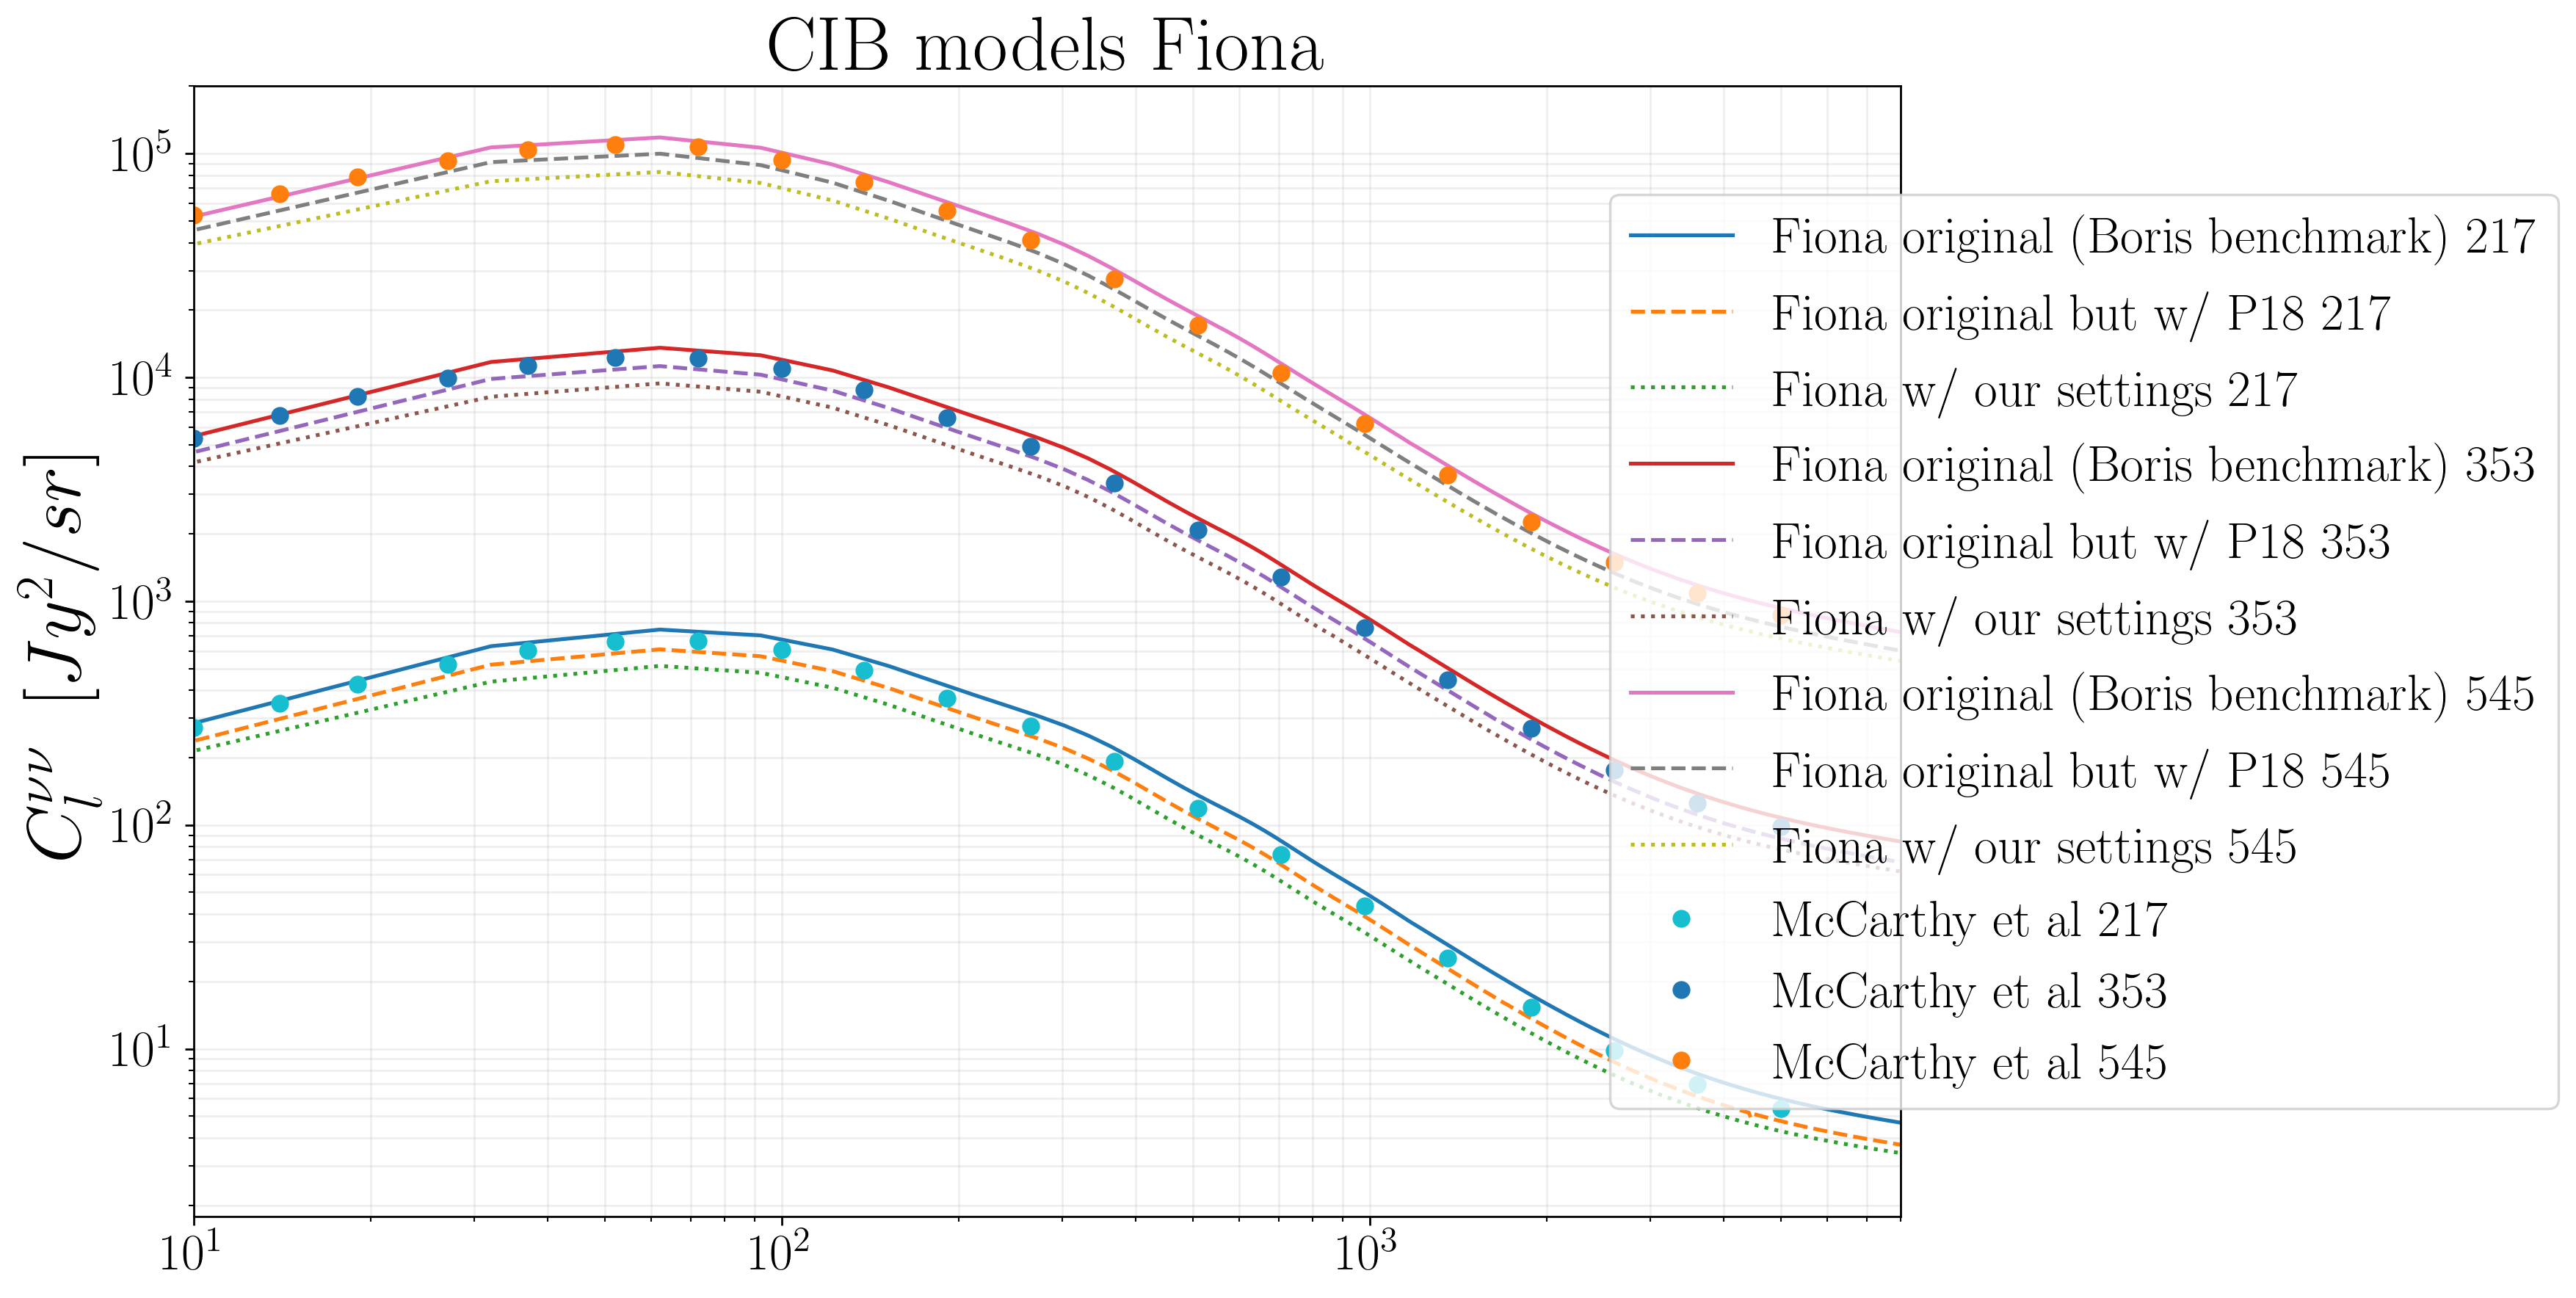

In [22]:
plt.figure(figsize=(12,8), dpi=250)
plt.ylabel(r"$C_l^{\nu \nu} \,\,\, [Jy^2/sr]$", size=30)
plt.title('CIB models Fiona ', fontsize=30)


for (i,nu) in enumerate(nu_list):
    #CIB fiona
    cib_fiona = np.asarray(cl_cib_cib_fiona[str(nu_list[i])+'x'+str(nu_list[i])]['1h']) + np.asarray(cl_cib_cib_fiona[str(nu_list[i])+'x'+str(nu_list[i])]['2h'])
    ell_fiona = np.asarray(cl_cib_cib_fiona[str(nu_list[0])+'x'+str(nu_list[0])]['ell'])
    cib_fiona2 = np.asarray(cl_cib_cib_fiona2[str(nu_list[i])+'x'+str(nu_list[i])]['1h']) + np.asarray(cl_cib_cib_fiona2[str(nu_list[i])+'x'+str(nu_list[i])]['2h'])
    ell_fiona2 = np.asarray(cl_cib_cib_fiona2[str(nu_list[0])+'x'+str(nu_list[0])]['ell'])
    #Fiona, Boris settings
    cib_boris = np.asarray(cl_cib_cib_boris[str(nu_list[i])+'x'+str(nu_list[i])]['1h']) + np.asarray(cl_cib_cib_boris[str(nu_list[i])+'x'+str(nu_list[i])]['2h'])
    ell_boris = np.asarray(cl_cib_cib_boris[str(nu_list[0])+'x'+str(nu_list[0])]['ell'])
    #websky
    #cib1 = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['1h']) + np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['2h'])
    #ell1 = np.asarray(cl_cib_cib[str(nu_list[0])+'x'+str(nu_list[0])]['ell'])
    
    #dl_to_cl1 = ell1*(ell1+1)/2/np.pi
    dl_to_cl = ell_fiona*(ell_fiona+1)/2/np.pi
    dl_to_cl2 = ell_fiona2*(ell_fiona2+1)/2/np.pi
    dl_to_cl_b = ell_boris*(ell_boris+1)/2/np.pi
    #plt.plot(ell1, cib1/dl_to_cl1, label=r'Websky %.1i'%(nu))
    plt.plot(ell_boris, cib_boris/dl_to_cl_b, "-", label=r'Fiona original (Boris benchmark) %.1i'%(nu))
    plt.plot(ell_fiona, cib_fiona/dl_to_cl, "--", label=r'Fiona original but w/ P18  %.1i'%(nu))
    plt.plot(ell_fiona2, cib_fiona2/dl_to_cl2, ":",  label=r'Fiona w/ our settings %.1i'%(nu))
plt.plot(ell_MM20, (cl_cib_cib_1h_MM20_217+cl_cib_cib_2h_MM20_217)/cl_to_dl_MM20,"o", label = "McCarthy et al 217")
plt.plot(ell_MM20, (cl_cib_cib_1h_MM20_353+cl_cib_cib_2h_MM20_353)/cl_to_dl_MM20,"o", label = "McCarthy et al  353")
plt.plot(ell_MM20, (cl_cib_cib_1h_MM20_545+cl_cib_cib_2h_MM20_545)/cl_to_dl_MM20,"o", label = "McCarthy et al  545")
    

plt.xlim(1.e1, 8.e3)
#plt.ylim(1e-4,0) 
plt.yscale("log")
plt.xscale("log")
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid(which='both',alpha=0.2)
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)



# Compare CIB to measuremnts from Lenz et al. 

In [23]:
## https://github.com/DanielLenz/PlanckCIB/blob/master/notebooks/inspecting_powerspectra.ipynb
# In addition to that, we provide the full CIB auto and cross power spectra for 353, 545, and 857 GHz in ``Cl_CIB_T1T2.csv``.
#This is derived on the NHI < 2.5e+20 mask. The units are Jy^2/sr.
import pandas as pd
file_lenz_cib = "/Users/aleksandra/Desktop/Cl_CIB_T1T2.csv"
df_cib_auto = pd.read_csv(file_lenz_cib , comment='#') 

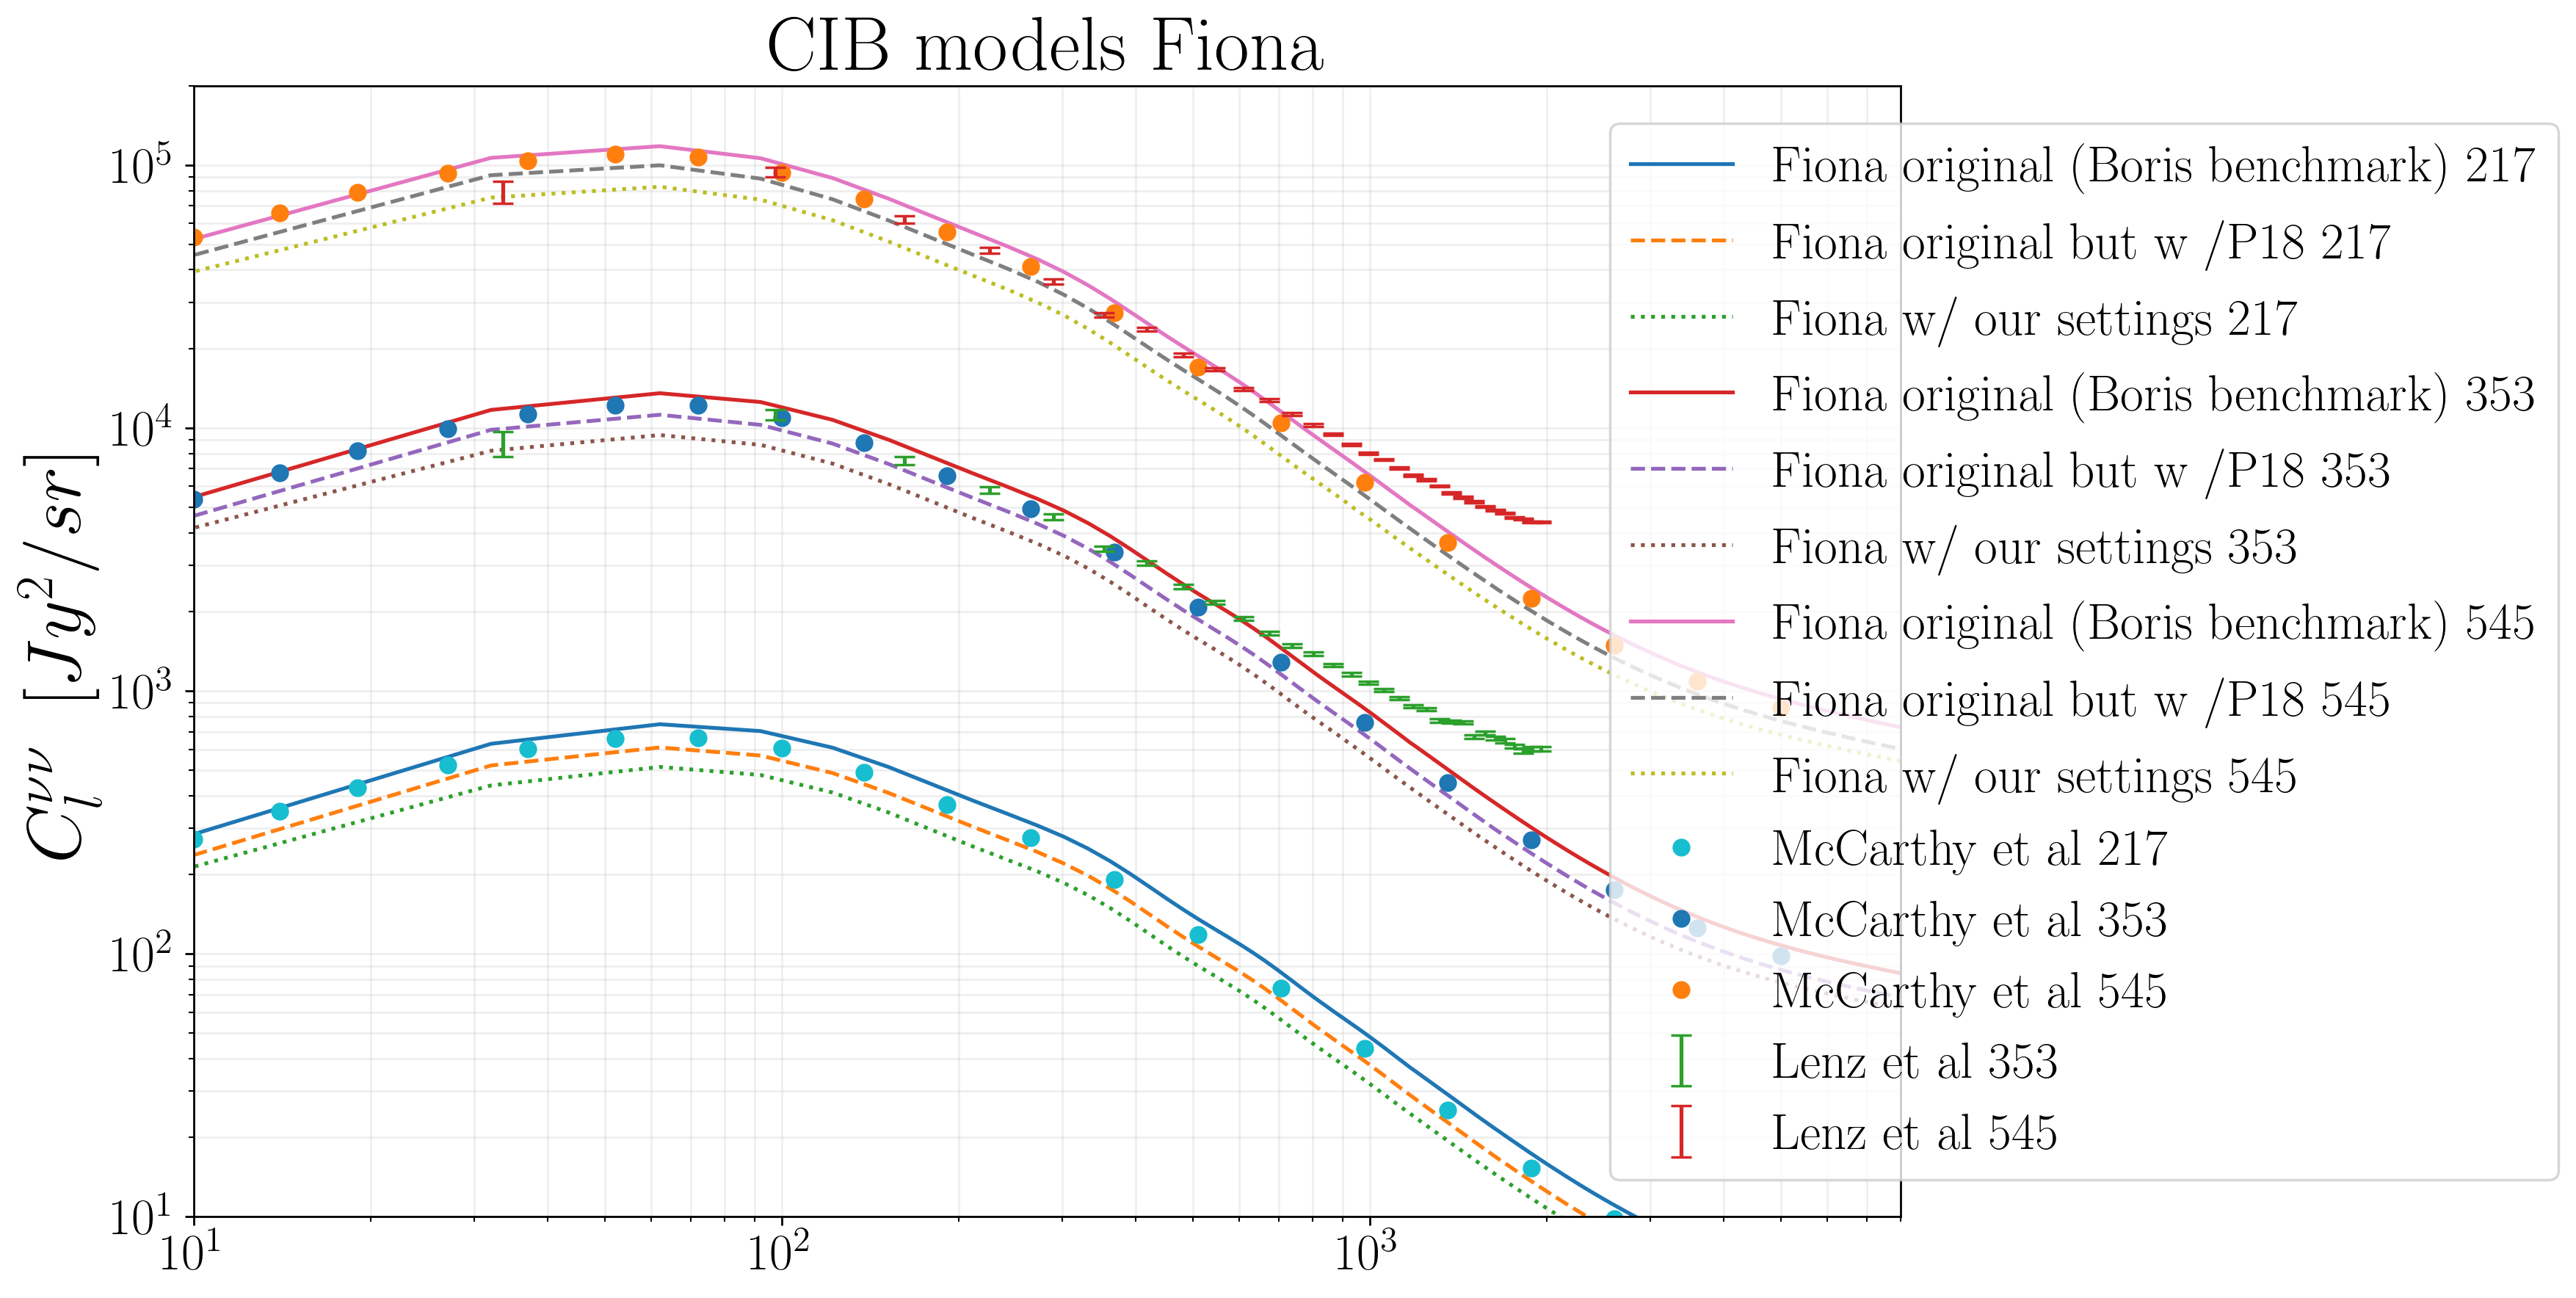

In [24]:
plt.figure(figsize=(12,8), dpi=250)
plt.ylabel(r"$C_l^{\nu \nu} \,\,\, [Jy^2/sr]$", size=30)
plt.title('CIB models Fiona ', fontsize=30)


for (i,nu) in enumerate(nu_list):
    #CIB fiona
    cib_fiona = np.asarray(cl_cib_cib_fiona[str(nu_list[i])+'x'+str(nu_list[i])]['1h']) + np.asarray(cl_cib_cib_fiona[str(nu_list[i])+'x'+str(nu_list[i])]['2h'])
    ell_fiona = np.asarray(cl_cib_cib_fiona[str(nu_list[0])+'x'+str(nu_list[0])]['ell'])
    cib_fiona2 = np.asarray(cl_cib_cib_fiona2[str(nu_list[i])+'x'+str(nu_list[i])]['1h']) + np.asarray(cl_cib_cib_fiona2[str(nu_list[i])+'x'+str(nu_list[i])]['2h'])
    ell_fiona2 = np.asarray(cl_cib_cib_fiona2[str(nu_list[0])+'x'+str(nu_list[0])]['ell'])
    #Fiona, Boris settings
    cib_boris = np.asarray(cl_cib_cib_boris[str(nu_list[i])+'x'+str(nu_list[i])]['1h']) + np.asarray(cl_cib_cib_boris[str(nu_list[i])+'x'+str(nu_list[i])]['2h'])
    ell_boris = np.asarray(cl_cib_cib_boris[str(nu_list[0])+'x'+str(nu_list[0])]['ell'])
#     #websky
#     cib1 = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['1h']) + np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['2h'])
#     ell1 = np.asarray(cl_cib_cib[str(nu_list[0])+'x'+str(nu_list[0])]['ell'])
#     dl_to_cl1 = ell1*(ell1+1)/2/np.pi
    dl_to_cl_b = ell_boris*(ell_boris+1)/2/np.pi
    dl_to_cl = ell_fiona*(ell_fiona+1)/2/np.pi
    dl_to_cl2 = ell_fiona2*(ell_fiona2+1)/2/np.pi
    
    plt.plot(ell_boris, cib_boris/dl_to_cl_b, "-", label=r'Fiona original (Boris benchmark) %.1i'%(nu))
    plt.plot(ell_fiona, cib_fiona/dl_to_cl, "--", label=r'Fiona original but w /P18  %.1i'%(nu))
    plt.plot(ell_fiona2, cib_fiona2/dl_to_cl2, ":",  label=r'Fiona w/ our settings %.1i'%(nu))
plt.plot(ell_MM20, (cl_cib_cib_1h_MM20_217+cl_cib_cib_2h_MM20_217)/cl_to_dl_MM20,"o", label = "McCarthy et al 217")
plt.plot(ell_MM20, (cl_cib_cib_1h_MM20_353+cl_cib_cib_2h_MM20_353)/cl_to_dl_MM20,"o", label = "McCarthy et al  353")
plt.plot(ell_MM20, (cl_cib_cib_1h_MM20_545+cl_cib_cib_2h_MM20_545)/cl_to_dl_MM20,"o", label = "McCarthy et al  545")
#lenz et al 
plt.errorbar(df_cib_auto['ell'], df_cib_auto['353x353'], yerr=df_cib_auto['d353x353'],ls="None", capsize=4, label = "Lenz et al 353")
plt.errorbar(df_cib_auto['ell'], df_cib_auto['545x545'], yerr=df_cib_auto['d545x545'],ls="None", capsize=4, label = "Lenz et al 545")
#plt.errorbar(df_cib_auto['ell'], df_cib_auto['353x353'], yerr=df_cib_auto['d353x545'],ls="None", capsize=4, label = "Lenz et al 217")

plt.xlim(1.e1, 8.e3)
plt.ylim(1e1,2e5) 
plt.yscale("log")
plt.xscale("log")
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid(which='both',alpha=0.2)
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)



# Compare CIB x g to measuremnts from Lenz et al. 

In [25]:
#CIB x g 
color = "blue"
freq=353

def convert_Jysr_to_uK(nu_in_GHz):
    # Appendix A of Fionas paper https://arxiv.org/pdf/2010.16405.pdf
    x = nu_in_GHz/56.233
    dB_MJy = 968*np.exp(x)*(nu_in_GHz/100)**4/(np.exp(x)-1)**2
    return dB_MJy

In [26]:
path_to_data_planckCIB = '/Users/aleksandra/Desktop/data_CIB_Planck/results/'

ell_data, cl_lenz545_blue, sigma_lenz545_blue = np.loadtxt(path_to_data_planckCIB+"CIB"+str(freq)+"_x_unWISE_"+color+"_Lenz_2.5e+20_gp20_MJysr.txt")
#ell_data, cl_lenz857_blue, sigma_lenz857_blue = np.loadtxt(path_to_data_planckCIB+"CIB857_x_unWISE_"+color+"_Lenz_2.5e+20_gp20_MJysr.txt")
ell_data, cl_planck545_blue, sigma_planck545_blue = np.loadtxt(path_to_data_planckCIB+"Planck"+str(freq)+"_x_unWISE_"+color+"_MJysr.txt")


In [27]:

ell_f, cl_fiona = np.loadtxt("/Users/aleksandra/software/ILC_class-sz_curves_data/ilc-moto-1-26_fionaCIB/ell_dl_"+str(freq)+"x"+str(freq)+"_GHz_CIBxg_wLensmag_"+color+".txt")
ell_wb, cl_websky = np.loadtxt("/Users/aleksandra/software/ILC_class-sz_curves_data/ilc-moto-1-30_webskyCIB_40HOD/ell_dl_"+str(freq)+"x"+str(freq)+"_GHz_CIBxg_wLensmag_"+color+".txt")


ell_f2, cl_fiona2 = np.loadtxt("/Users/aleksandra/software/ILC_class-sz_curves_data/1-30_Fionacib_40HOD/ell_dl_"+str(freq)+"x"+str(freq)+"_GHz_CIBxg_wLensmag_"+color+".txt")
ell_wb2, cl_websky2 = np.loadtxt("/Users/aleksandra/software/ILC_class-sz_curves_data/1-30_webskycib_40HOD/ell_dl_"+str(freq)+"x"+str(freq)+"_GHz_CIBxg_wLensmag_"+color+".txt")

ell_f3, cl_fiona3 = np.loadtxt("/Users/aleksandra/software/ILC_class-sz_curves_data/2-2_FionaCIB_40HODslighlyDifferent/ell_dl_"+str(freq)+"x"+str(freq)+"_GHz_CIBxg_wLensmag_"+color+".txt")
ell_wb3, cl_websky3 = np.loadtxt("/Users/aleksandra/software/ILC_class-sz_curves_data/2-2_webskyCIB_40HODslighlyDifferent/ell_dl_"+str(freq)+"x"+str(freq)+"_GHz_CIBxg_wLensmag_"+color+".txt")

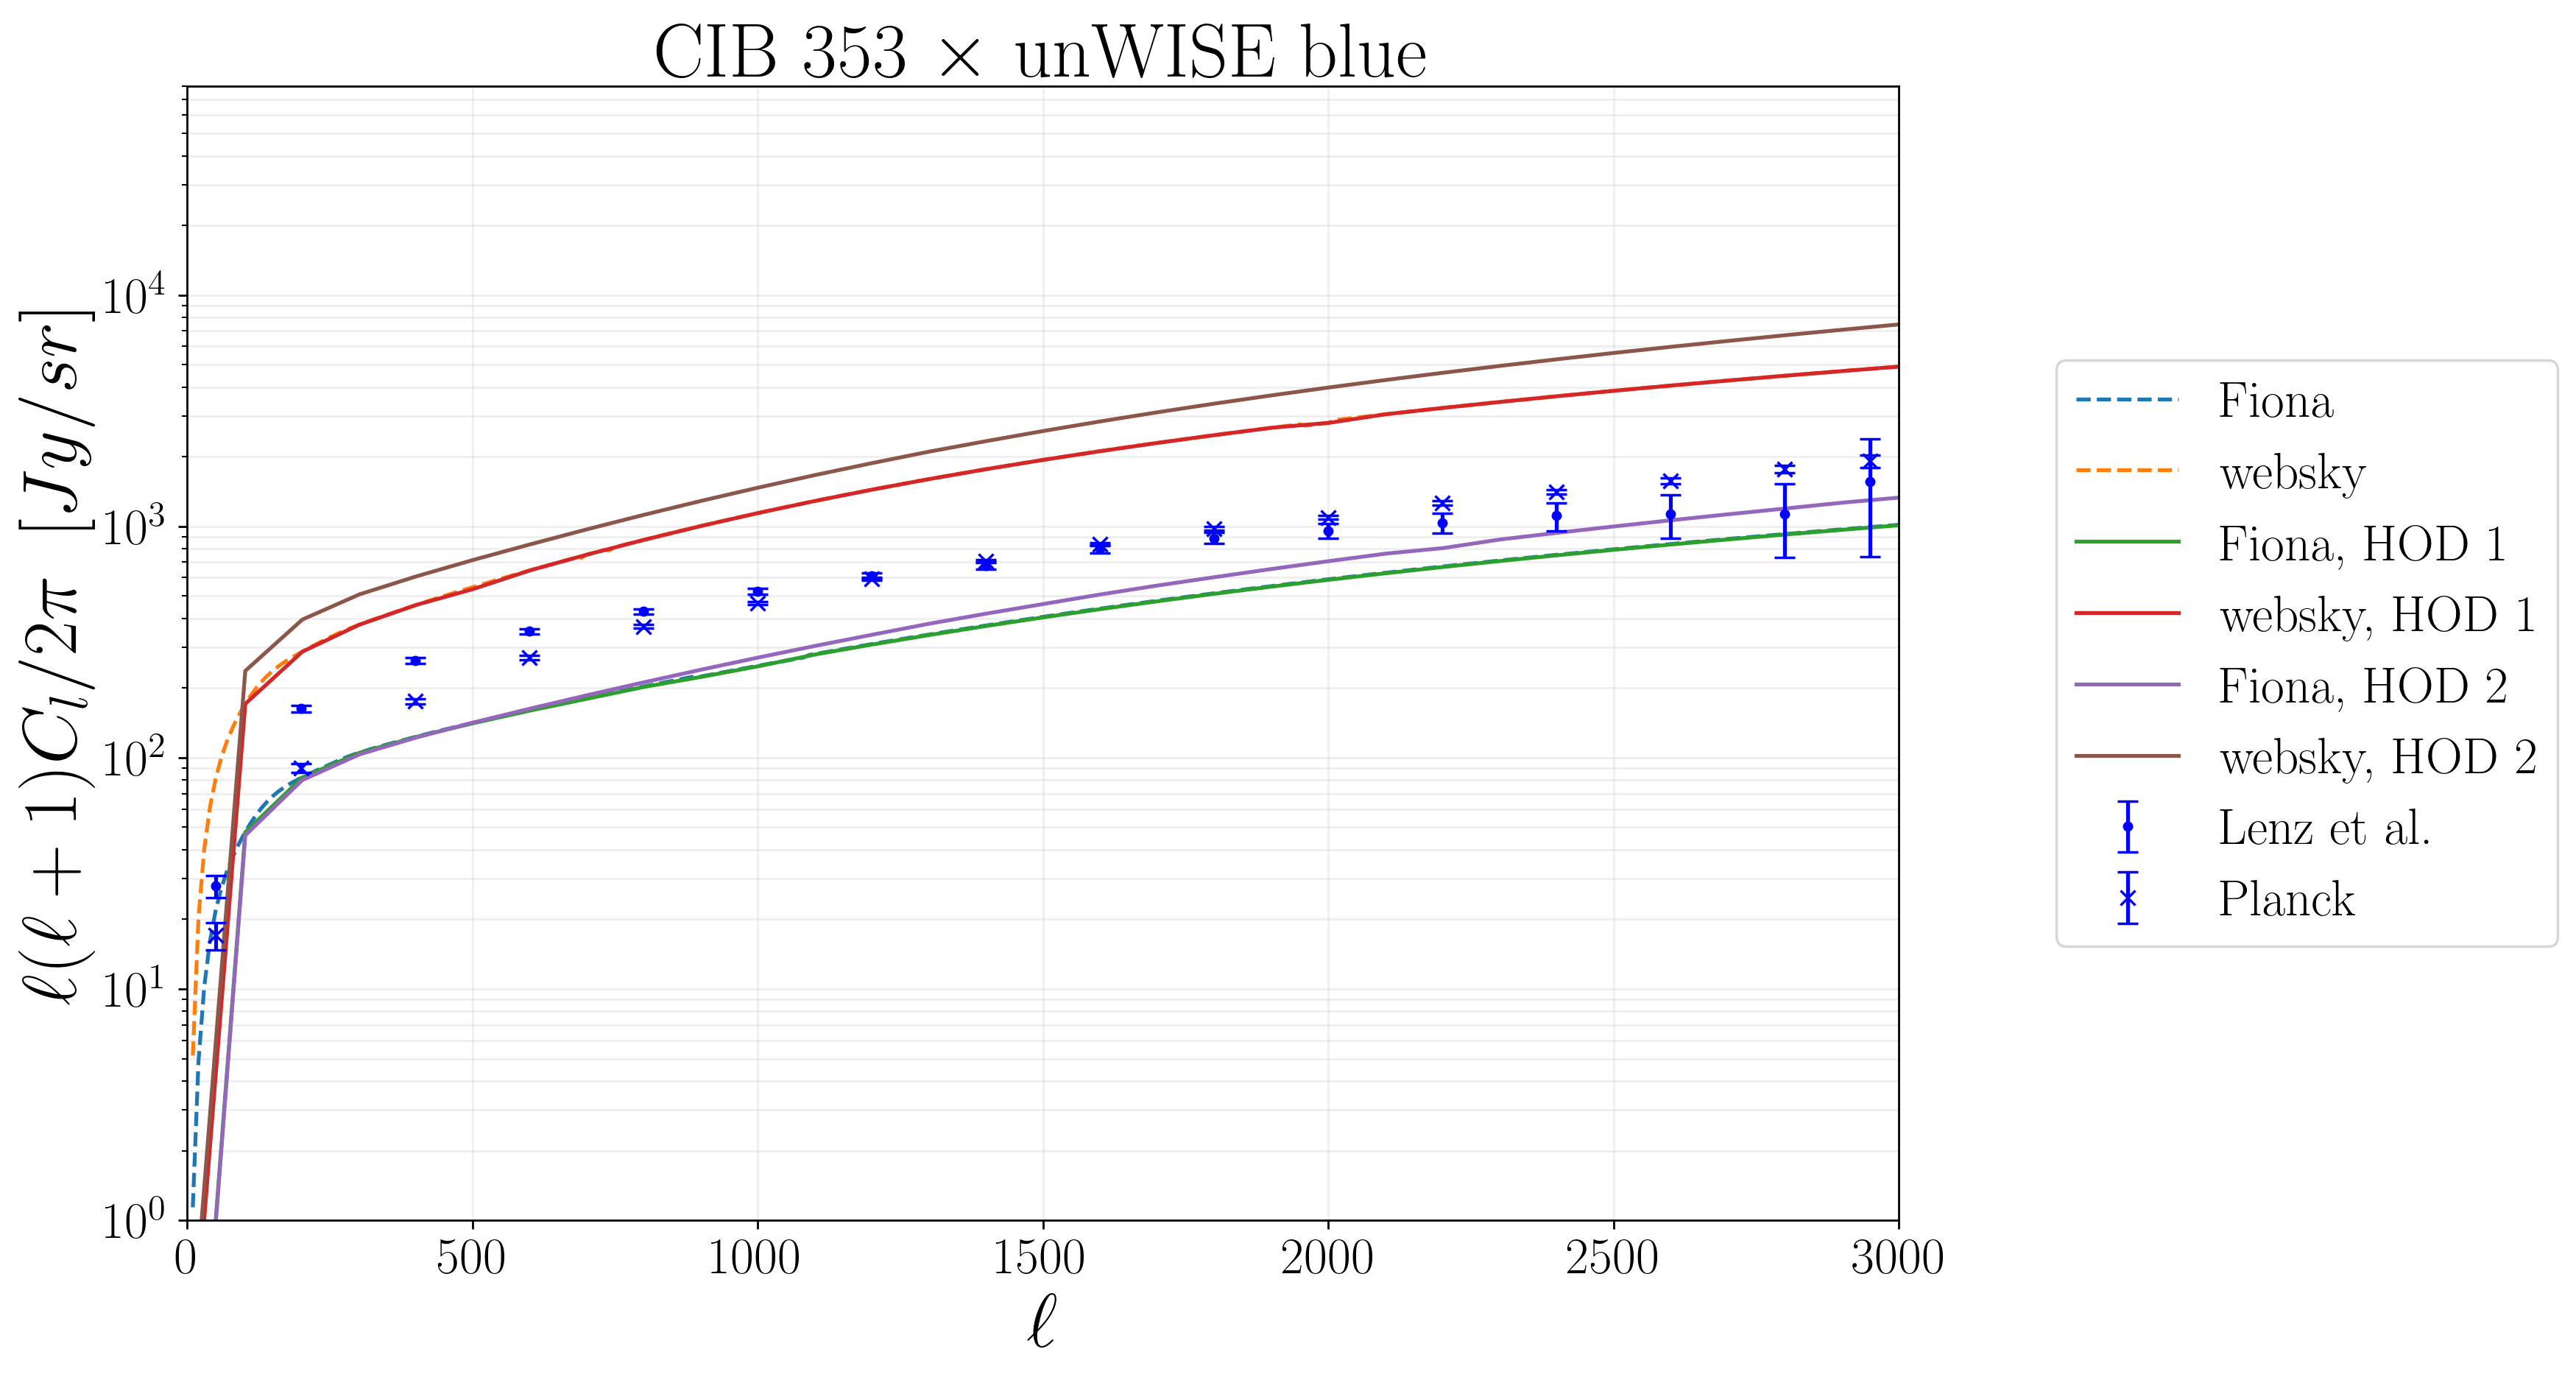

In [28]:
plt.figure(figsize=(12,8), dpi=250)
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"$\ell (\ell+1) C_l / 2 \pi \,\,\, [Jy/sr]$", fontsize=30)
plt.title(' CIB %.3i $\\times$ unWISE  %.5s'%( freq,color), fontsize=30)

plt.plot(ell_f, cl_fiona*convert_Jysr_to_uK(freq), "--", label = "Fiona")
plt.plot(ell_wb, cl_websky*convert_Jysr_to_uK(freq), "--", label = "websky")

plt.plot(ell_f2, cl_fiona2*convert_Jysr_to_uK(freq), label = "Fiona, HOD 1")
plt.plot(ell_wb2, cl_websky2*convert_Jysr_to_uK(freq), label = "websky, HOD 1")
plt.plot(ell_f3, cl_fiona3*convert_Jysr_to_uK(freq), label = "Fiona, HOD 2")
plt.plot(ell_wb3, cl_websky3*convert_Jysr_to_uK(freq), label = "websky, HOD 2")

plt.errorbar(ell_data, cl_lenz545_blue*1e6, yerr = sigma_lenz545_blue*1e6,  fmt= ".", color = color , capsize=4, label=" Lenz et al. ")
plt.errorbar(ell_data, cl_planck545_blue*1e6, yerr = sigma_planck545_blue*1e6,  fmt= "x", color = color, capsize=4, label=" Planck")


plt.yscale("log")
# plt.xscale("log")
plt.xlim(0, 3.e3)
plt.ylim(1e0,8.e4)  
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid(which='both',alpha=0.2)
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)


In [29]:
def dIcibdz_at_z_and_nu(f,
                z_range,
                zobs=zMIN,
                nz=1000.,
                nnu=1000.,
                nzLsat=101,
                nmLsat=102,
                nnuLsat=103,
                Lsatabs=1e-15,
                Lsatrel=1e-6,
                zrel=1e-4,
                zabs=1e-100,
                mrel=1e-4,
                mabs=1e-100,
                z_ev_Tdust=0.36,
                Tdust=24.4,
                emmissivity=1.75,
                plaw_SED_highnu=1.7,
                r_ev_LM=3.6,
                most_efficient_halo=10.**12.6,
                halo_size=0.5):
    M = Class()
    M.set(p18_cosmo)
    M.set({# class_sz parameters:
           'output': 'dcib0dz',
           'hm_consistency': 0,
           'Redshift evolution of dust temperature' :  z_ev_Tdust,
           'Dust temperature today in Kelvins' : Tdust,
           'Emissivity index of sed' : emmissivity,
           'Power law index of SED at high frequency' : plaw_SED_highnu,
           'Redshift evolution of L − M normalisation' : r_ev_LM,
           'Most efficient halo mass in Msun' : most_efficient_halo,
           'Normalisation of L − M relation in [Jy MPc2/Msun]' : 6.4e-8,
           'Size of of halo masses sourcing CIB emission' : halo_size,
            # M_min_HOD is the threshold above which nc = 1:
            'M_min_HOD' : 10.**10,
            #'M1_prime_HOD': 10.**12.51536196*p18_cosmo['h'],
            'M_min' : 1e10*p18_cosmo['h'],
            'M_max' : 1e16*p18_cosmo['h'],
            'z_min' : z_range[0],
            'z_max' : z_range[1],
            'mass function' : 'T10',
            'T10_alpha_fixed': 0,
            'hm_consistency': 0,
            'redshift_epsrel': zrel,
            'redshift_epsabs': zabs,
            'mass_epsrel':mrel,
            'mass_epsabs':mabs,
            'freq_min': f[0]/10.0**9,
            'freq_max': f[-1]/10.0**9,
            'n_z_dcib0dz': nz,
            'n_nu_dcib0dz': nnu,
            'redshift_epsrel': zrel,
            'redshift_epsabs': zabs,
            'mass_epsrel': mrel,
            'mass_epsabs':mabs,
            'z1SZ_L_sat': z_range[0]/2.,
            'z2SZ_L_sat': z_range[1]+1,
            'n_z_L_sat': nzLsat,
            'n_m_L_sat': nmLsat,
            'n_nu_L_sat': nnuLsat,
            'epsabs_L_sat':Lsatabs,
            'epsrel_L_sat': Lsatrel,
            'z_obs (CIB)': zobs,
            })
    M.compute()
    get_dcib0dz_at_z_and_nu = np.vectorize(M.get_dcib0dz_at_z_and_nu)
    return get_dcib0dz_at_z_and_nu

NameError: name 'zMIN' is not defined

In [ ]:
cl_gg['2h']

In [ ]:
fiona_cib= {

'hm_consistency': 1,

'Redshift evolution of dust temperature' :  0.36,
'Dust temperature today in Kelvins' : 24.4,
'Emissivity index of sed' : 1.75,
'Power law index of SED at high frequency' : 1.7,
'Redshift evolution of L − M normalisation' : 3.6,
'Most efficient halo mass in Msun' : 10.**12.6,
'Normalisation of L − M relation in [Jy MPc2/Msun]' : 6.4e-8,
'Size of of halo masses sourcing CIB emission' : 0.5,

# M_min_HOD is the threshold above which nc = 1:
'M_min_HOD_cib' : 10.**10,

'M_min_cib' : 1e10*p18_pdict['h'],
'M_max_cib' : 1e16*p18_pdict['h'],
'z_min' : 0.001,
'z_max' : 9,
'freq_min': 2e1,
'freq_max': 4e3,
'dlogfreq' : 0.05 ,
'output':'cib_cib_1h,cib_cib_2h',

}

In [ ]:

z_range = [0.005,12]
zMIN = 0.000
f = [10*1e9, 2000*1e9]
zobs=zMIN
nz=1000.
nnu=1000.
nzLsat=101
nmLsat=102
nnuLsat=103
Lsatabs=1e-15
Lsatrel=1e-6
zrel=1e-4
zabs=1e-100
mrel=1e-4
mabs=1e-100
z_ev_Tdust=0.36
Tdust=24.4
emmissivity=1.75
plaw_SED_highnu=1.7
r_ev_LM=3.6
most_efficient_halo=10.**12.6
halo_size=0.5


fiona_alina_loc = {

'output':'cib_cib_1h,cib_cib_2h',
'hm_consistency': 1,
'Redshift evolution of dust temperature' :  z_ev_Tdust,
'Dust temperature today in Kelvins' : Tdust,
'Emissivity index of sed' : emmissivity,
'Power law index of SED at high frequency' : plaw_SED_highnu,
'Redshift evolution of L − M normalisation' : r_ev_LM,
'Most efficient halo mass in Msun' : most_efficient_halo,
'Normalisation of L − M relation in [Jy MPc2/Msun]' : 6.4e-8,
'Size of of halo masses sourcing CIB emission' : halo_size,
# M_min_HOD is the threshold above which nc = 1:
'M_min_HOD_cib' : 10.**10,
#'M1_prime_HOD': 10.**12.51536196*p18_cosmo['h'],
# 'M_min_cib' : 1e8*p18_cosmo ['h'],
# 'M_max_cib' : 1e16*p18_cosmo ['h'],
 'M_min' : 1e8*p18_cosmo ['h'],
 'M_max' : 1e16*p18_cosmo ['h'],
'z_min' : z_range[0],
'z_max' : z_range[1],
'mass function' : 'T10',
'T10_alpha_fixed': 0,
'redshift_epsrel': zrel,
'redshift_epsabs': zabs,
'mass_epsrel':mrel,
'mass_epsabs':mabs,
'freq_min': 10,
'freq_max': 1000,
#'n_z_dcib0dz': nz,
#'n_nu_dcib0dz': nnu,
'redshift_epsrel': zrel,
'redshift_epsabs': zabs,
'mass_epsrel': mrel,
'mass_epsabs':mabs,
'z1SZ_L_sat': z_range[0]/2.,
'z2SZ_L_sat': z_range[1]+1,
'n_z_L_sat': nzLsat,
'n_m_L_sat': nmLsat,
'n_nu_L_sat': nnuLsat,
'epsabs_L_sat':Lsatabs,
'epsrel_L_sat': Lsatrel,
'ell_min': 2, 
'ell_max':1e4,
'dell':100,
'delta for cib': '200m'
}


